In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [16]:
csv_folder_dir = "data/csv/out_of_sample/"
csv_list = [x for x in os.listdir(csv_folder_dir) if not x.startswith(".")]

prices_df = None

for csv_name in csv_list:
    csv_dir = os.path.join(csv_folder_dir, csv_name)
    current_df = pd.read_csv(csv_dir, 
                             usecols=['Date', 'Close'],
                             parse_dates=['Date'])
    current_df.rename(columns={'Close': f"{csv_name[:-4]}"}, inplace=True)
    
    # Merge the current DataFrame with the final DataFrame
    if prices_df is None:
        prices_df = current_df  # Initialize with the first DataFrame
    else:
        prices_df = pd.merge(prices_df, current_df, on='Date', how='outer')  # Merge on 'Date' 

In [17]:
prices_df

,Date,CSCO,UAL,TROW,ISRG,NVR,TPR,DVN,CE,MRO,...,WM,DOV,CRM,PGR,WAT,IEX,BWA,LRCX,BLK,PPL
0,2021-01-04,43.959999,41.630001,147.690002,266.666656,4040.649902,32.709999,16.129999,125.930000,6.830000,...,114.830002,123.339996,220.309998,97.129997,250.149994,195.309998,33.503521,47.801998,710.820007,27.580000
1,2021-01-05,43.980000,43.400002,149.089996,268.350006,4008.909912,32.520000,17.360001,131.600006,7.450000,...,115.209999,124.059998,221.520004,96.949997,255.429993,194.929993,34.295776,49.455002,714.580017,27.610001
2,2021-01-06,44.400002,43.540001,151.529999,264.263336,3966.489990,34.320000,18.320000,136.550003,7.500000,...,117.760002,127.559998,216.149994,98.790001,262.470001,202.179993,35.360916,49.648998,734.960022,28.110001
3,2021-01-07,44.959999,43.619999,154.550003,269.403320,4025.929932,34.869999,18.570000,139.419998,7.690000,...,118.050003,129.449997,217.979996,94.739998,260.790009,208.240005,36.179577,51.445999,750.419983,27.740000
4,2021-01-08,45.060001,43.290001,154.520004,272.916656,3930.000000,34.230000,18.110001,136.820007,7.550000,...,118.599998,129.449997,222.039993,94.500000,261.820007,206.919998,35.466549,50.162998,756.450012,27.809999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,2024-11-13,59.180000,89.779999,118.489998,536.690002,9105.669922,51.259998,39.110001,74.000000,28.620001,...,225.679993,203.990005,341.720001,261.369995,385.619995,231.000000,34.810001,73.849998,1030.979980,33.490002
973,2024-11-14,57.919998,91.160004,119.800003,537.799988,9179.610352,57.820000,39.380001,73.940002,28.850000,...,221.720001,202.089996,331.649994,257.500000,376.720001,229.389999,34.430000,74.790001,1047.079956,33.209999
974,2024-11-15,57.459999,91.169998,118.769997,527.609985,9026.000000,57.230000,38.470001,73.779999,28.590000,...,217.899994,201.179993,325.260010,255.779999,358.459991,227.830002,34.500000,70.050003,1047.369995,33.700001
975,2024-11-18,57.310001,90.379997,118.660004,531.640015,8865.629883,56.549999,38.770000,73.000000,28.990000,...,218.309998,200.529999,322.250000,256.519989,355.470001,226.660004,34.380001,70.570000,1049.969971,34.000000


# Random portfolio

In [18]:
import random
window_size = 5
rand_long_returns = []
rand_short_returns = []
for today in range(5, len(prices_df), 5):
    to_buy = random.sample(list(prices_df.columns[1:]), 50)
    to_sell = random.sample(list(prices_df.columns[1:]), 50)    

    long_stocks = prices_df[to_buy]
    short_stocks = prices_df[to_sell]

    long_pos_start = long_stocks.iloc[today + window_size]
    long_pos_end = long_stocks.iloc[today + 2*window_size]
    long_pos_diff = (long_pos_end - long_pos_start)/long_pos_start
    
    short_pos_start = short_stocks.iloc[today + window_size]
    short_pos_end = short_stocks.iloc[today + 2*window_size]
    short_pos_diff = -(short_pos_end - short_pos_start)/short_pos_start

    long_portfolio_return = long_pos_diff.mean()
    short_portfolio_return = short_pos_diff.mean()

    rand_long_returns.append(long_portfolio_return)
    rand_short_returns.append(short_portfolio_return)

IndexError: single positional indexer is out-of-bounds

In [19]:
rand_portfolio = pd.DataFrame({"Long portfolio": rand_long_returns,
                              "Short portfolio": rand_short_returns})
rand_portfolio["Long Short portfolio"] = rand_portfolio["Long portfolio"] + rand_portfolio["Short portfolio"]
rand_portfolio

,Long portfolio,Short portfolio,Long Short portfolio
0,-0.000655,0.014579,0.013924
1,0.002811,0.010883,0.013694
2,0.028278,-0.015877,0.012402
3,0.003486,-0.011852,-0.008366
4,0.017989,-0.011039,0.006950
...,...,...,...
188,-0.004050,0.006513,0.002463
189,-0.006598,0.008243,0.001645
190,-0.023201,0.019299,-0.003902
191,0.041948,-0.048812,-0.006864


In [20]:
rand_portfolio.mean()

Long portfolio          0.002765
Short portfolio        -0.001588
Long Short portfolio    0.001177
dtype: float64

In [21]:
rand_long_portfolio = 1000
rand_long_portfolio_history = []
rand_long_short_portfolio = 1000
rand_long_short_portfolio_history = []
for _, row in rand_portfolio.iterrows():
    rand_long_portfolio *= (1 + row["Long portfolio"]) 
    rand_long_short_portfolio *= (1 + row["Long Short portfolio"])
    rand_long_portfolio_history.append(rand_long_portfolio)
    rand_long_short_portfolio_history.append(rand_long_short_portfolio)

In [22]:
rand_long_portfolio

1611.918124052115

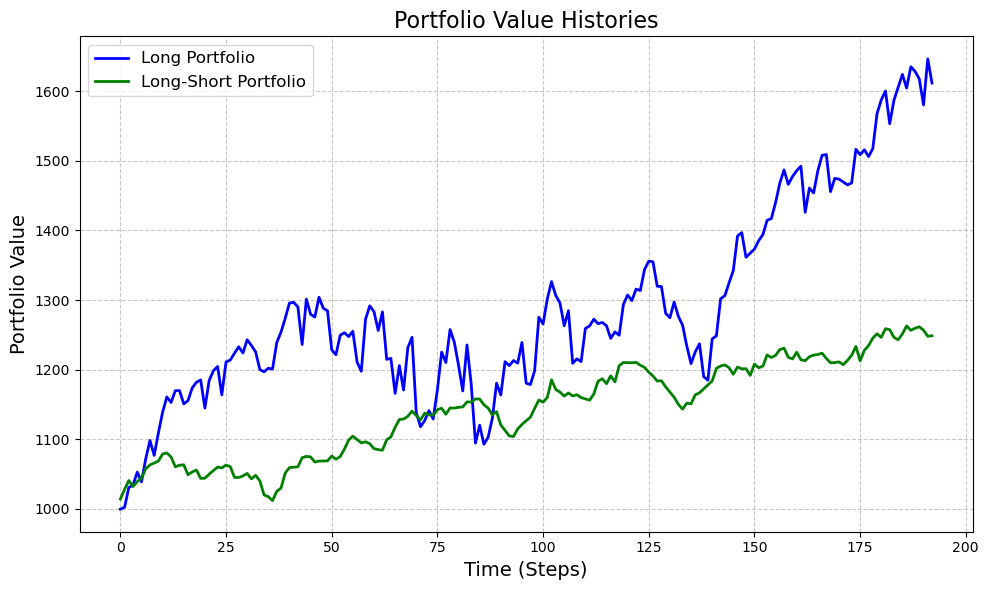

In [24]:

plt.figure(figsize=(10, 6))

# Plot the histories
plt.plot(rand_long_portfolio_history, label="Long Portfolio", color='blue', linewidth=2)
plt.plot(rand_long_short_portfolio_history, label="Long-Short Portfolio", color='green', linewidth=2)

# Add labels, legend, and title
plt.title("Portfolio Value Histories", fontsize=16)
plt.xlabel("Time (Steps)", fontsize=14)
plt.ylabel("Portfolio Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# UNIFORM

In [25]:
import random
window_size = 5
unif_long_returns = []
unif_short_returns = []
for today in range(5, len(prices_df), 5):
    to_buy = list(prices_df.columns[1:])
    to_sell = list(prices_df.columns[1:])

    long_stocks = prices_df[to_buy]
    short_stocks = prices_df[to_sell]

    long_pos_start = long_stocks.iloc[today + window_size]
    long_pos_end = long_stocks.iloc[today + 2*window_size]
    long_pos_diff = (long_pos_end - long_pos_start)/long_pos_start
    
    short_pos_start = short_stocks.iloc[today + window_size]
    short_pos_end = short_stocks.iloc[today + 2*window_size]
    short_pos_diff = -(short_pos_end - short_pos_start)/short_pos_start

    long_portfolio_return = long_pos_diff.mean()
    short_portfolio_return = short_pos_diff.mean()

    unif_long_returns.append(long_portfolio_return)
    unif_short_returns.append(short_portfolio_return)

IndexError: single positional indexer is out-of-bounds

In [26]:
unif_portfolio = pd.DataFrame({"Long portfolio": unif_long_returns,
                              "Short portfolio": unif_short_returns})
unif_portfolio["Long Short portfolio"] = unif_portfolio["Long portfolio"] + unif_portfolio["Short portfolio"]
unif_portfolio

,Long portfolio,Short portfolio,Long Short portfolio
0,-0.008207,0.008207,0.0
1,-0.002410,0.002410,0.0
2,0.031551,-0.031551,0.0
3,0.008241,-0.008241,0.0
4,0.016197,-0.016197,0.0
...,...,...,...
188,-0.004742,0.004742,0.0
189,-0.006707,0.006707,0.0
190,-0.013666,0.013666,0.0
191,0.044686,-0.044686,0.0


In [27]:
unif_portfolio.mean()

Long portfolio          0.00254
Short portfolio        -0.00254
Long Short portfolio    0.00000
dtype: float64

In [28]:
unif_long_portfolio = 1000
unif_long_portfolio_history = []
for _, row in unif_portfolio.iterrows():
    unif_long_portfolio *= (1 + row["Long portfolio"]) 
    unif_long_portfolio_history.append(unif_long_portfolio)

In [29]:
unif_long_portfolio

1547.0951741568208